In [1]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'
'chmod 600 /content/kaggle.json'
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [2]:
!kaggle datasets download 'msambare/fer2013'

Dataset URL: https://www.kaggle.com/datasets/msambare/fer2013
License(s): DbCL-1.0
 94% 57.0M/60.3M [00:01<00:00, 44.1MB/s]
100% 60.3M/60.3M [00:01<00:00, 34.8MB/s]


In [3]:
import zipfile
dataset_zip = zipfile.ZipFile('/content/fer2013.zip','r')
dataset_zip.extractall('dataset')
dataset_zip.close()

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras import Sequential
from keras.layers import Dense,Conv2D, MaxPooling2D, Flatten , Dropout,MaxPool2D, BatchNormalization, Dropout,Activation

In [6]:
datagen_train = ImageDataGenerator(
    rescale=1./255
)

datagen_val = ImageDataGenerator(
    rescale=1./255
)
batch_size = 32

In [7]:
import shutil

shutil.rmtree('/content/dataset/train/surprise')
shutil.rmtree('/content/dataset/train/angry')
shutil.rmtree('/content/dataset/train/disgust')
shutil.rmtree('/content/dataset/train/fear')
shutil.rmtree('/content/dataset/test/surprise')
shutil.rmtree('/content/dataset/test/angry')
shutil.rmtree('/content/dataset/test/disgust')
shutil.rmtree('/content/dataset/test/fear')

In [26]:
train_ds = datagen_train.flow_from_directory(
    directory='/content/dataset/train',
    color_mode="grayscale",
    batch_size=32,
    target_size = (48,48),

)



val_ds =datagen_val.flow_from_directory(
    directory='/content/dataset/test',
    color_mode="grayscale",
    batch_size=32,
    target_size = (48,48),
    shuffle=False
)

Found 17010 images belonging to 3 classes.
Found 4254 images belonging to 3 classes.


In [9]:
from keras.optimizers import Adam,SGD,RMSprop


no_of_classes = 3

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 64)        256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

In [10]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("model.h5", monitor='val_acc', verbose=1)

early_stopping = EarlyStopping(monitor='val_loss',
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )
callbacks_list = [early_stopping,checkpoint]

In [11]:
from keras.optimizers import Adam
opt = Adam(learning_rate=0.0001)
model.compile(loss='categorical_crossentropy',
              optimizer = opt,
              metrics=['accuracy'])

In [12]:
history = model.fit(train_ds, epochs=30, validation_data=val_ds, callbacks=[callbacks_list])

Epoch 1/30
530/532 [============================>.] - ETA: 0s - loss: 1.2001 - accuracy: 0.4133
Epoch 1: saving model to model.h5
532/532 [==============================] - 26s 30ms/step - loss: 1.2001 - accuracy: 0.4133 - val_loss: 1.0776 - val_accuracy: 0.3742
Epoch 2/30
  1/532 [..............................] - ETA: 22s - loss: 1.2534 - accuracy: 0.4062

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


531/532 [============================>.] - ETA: 0s - loss: 1.0645 - accuracy: 0.4890
Epoch 2: saving model to model.h5
532/532 [==============================] - 15s 28ms/step - loss: 1.0644 - accuracy: 0.4890 - val_loss: 0.9439 - val_accuracy: 0.5282
Epoch 3/30
530/532 [============================>.] - ETA: 0s - loss: 0.9809 - accuracy: 0.5376
Epoch 3: saving model to model.h5
532/532 [==============================] - 16s 30ms/step - loss: 0.9809 - accuracy: 0.5378 - val_loss: 0.8682 - val_accuracy: 0.5858
Epoch 4/30
531/532 [============================>.] - ETA: 0s - loss: 0.9162 - accuracy: 0.5697
Epoch 4: saving model to model.h5
532/532 [==============================] - 20s 37ms/step - loss: 0.9164 - accuracy: 0.5694 - val_loss: 0.8496 - val_accuracy: 0.5957
Epoch 5/30
531/532 [============================>.] - ETA: 0s - loss: 0.8632 - accuracy: 0.6016
Epoch 5: saving model to model.h5
532/532 [==============================] - 17s 32ms/step - loss: 0.8629 - accuracy: 0.6018 -

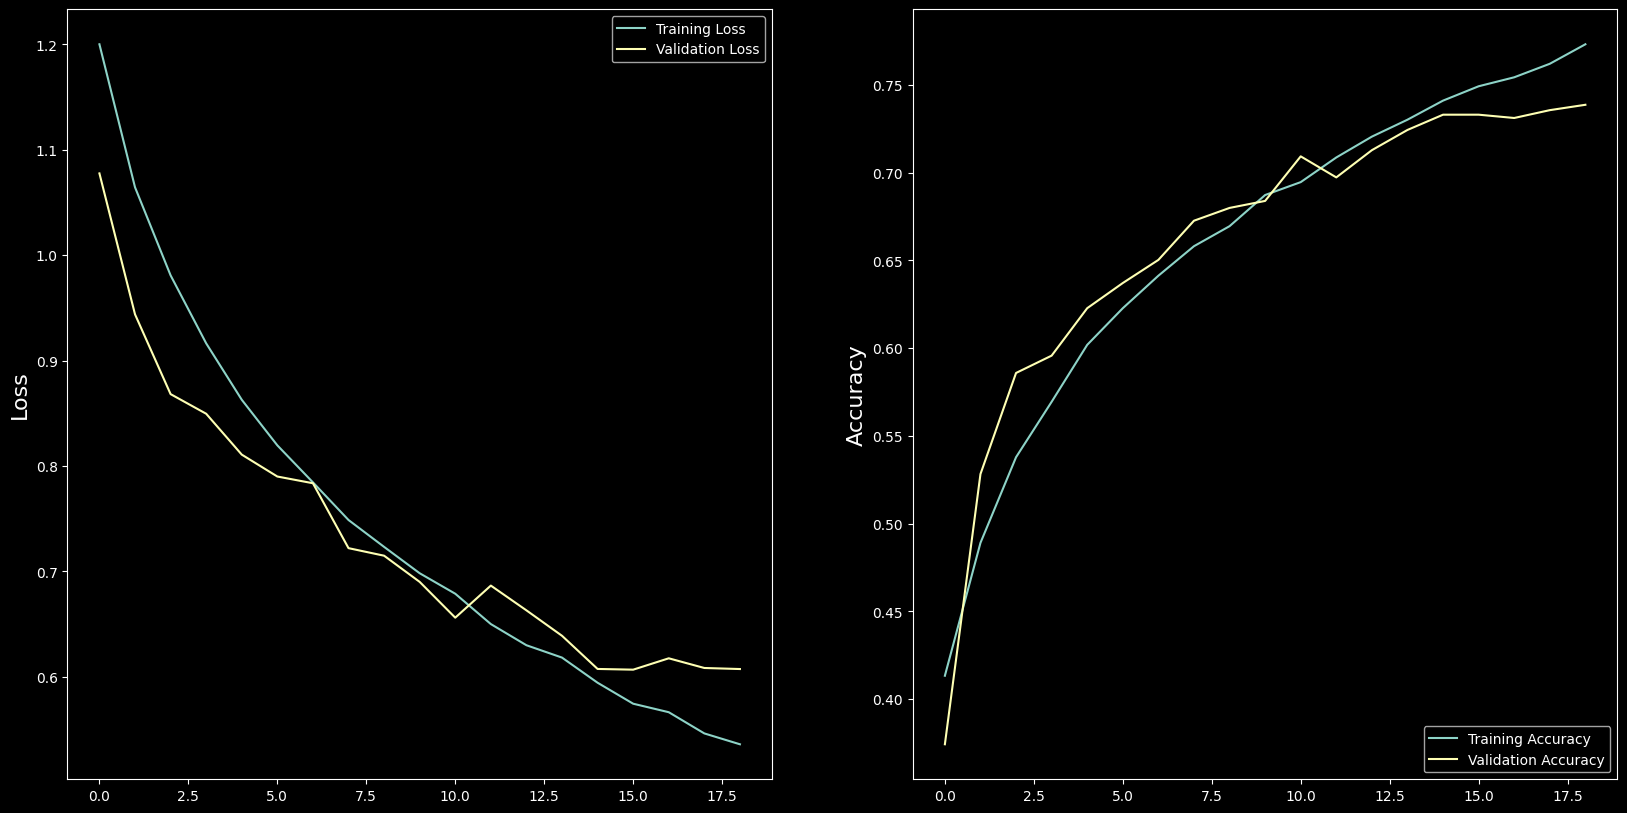

In [18]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [19]:
loss ,accuracy = model.evaluate(val_ds)

133/133 [==============================] - 2s 16ms/step - loss: 0.6069 - accuracy: 0.7330


In [20]:
accuracy

0.7329572439193726

In [27]:
pred = model.predict(val_ds)

133/133 [==============================] - 2s 12ms/step


In [28]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score
from sklearn.metrics import classification_report
import numpy as np


In [29]:
rounded=np.argmax(pred , axis=1)
print(classification_report(val_ds.classes,rounded))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86      1774
           1       0.60      0.75      0.67      1233
           2       0.67      0.56      0.61      1247

    accuracy                           0.73      4254
   macro avg       0.72      0.72      0.72      4254
weighted avg       0.74      0.73      0.73      4254

